In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
#we generate sinc function values in [-15,15] with optional noise and outliers
def generate_sinc(n_points=300, noise_std=0.0, outlier_ratio=0.0, rng=None):
    rng = np.random.default_rng(rng)
    X = np.linspace(-15, 15, n_points)
    y = np.sinc(X/np.pi)  # sinc(x) = sin(x)/x, numpy's sinc is normalized
    y += rng.normal(0, noise_std, size=n_points)  # add Gaussian noise
    n_outliers = int(outlier_ratio * n_points)
    if n_outliers > 0:
        idx = rng.choice(n_points, n_outliers, replace=False)
        y[idx] += rng.normal(5, 2, size=n_outliers)  # add spikes
    return X.reshape(-1,1), y

In [9]:
#we fit LinearRegression on known data and return predictions
def simple_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred, model

In [10]:
#we fit PolynomialFeatures+LinearRegression of given degree
def polynomial_regression(X, y, degree=3):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=True)),
        ('lin', LinearRegression())
    ])
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred, model

In [11]:
#we fit Ridge regression with scaling and stronger alpha
def ridge_regression(X, y, degree=10, alpha=10.0):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=True)),
        ('scaler', StandardScaler()),   # normalize features
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred, model

In [12]:
#we fit Lasso regression with scaling and more iterations
def lasso_regression(X, y, degree=10, alpha=0.01, max_iter=50000):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=True)),
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, max_iter=max_iter))
    ])
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred, model

In [13]:
#we fit ElasticNet regression with scaling and more iterations
def elasticnet_regression(X, y, degree=10, alpha=0.01, l1_ratio=0.5, max_iter=50000):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=True)),
        ('scaler', StandardScaler()),
        ('elastic', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter))
    ])
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred, model

In [14]:
#we compute MSE and MAE between true and predicted values
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, mae

Linear: 1.3175211249700303 0.49762712946829507
Poly: 1.1988820476349098 0.4007936843612279
Ridge: 1.2375613494909643 0.4379904168205011
Lasso: 1.2391359604939138 0.43776480472269724
ElasticNet: 1.2358770267393262 0.4323776325444702


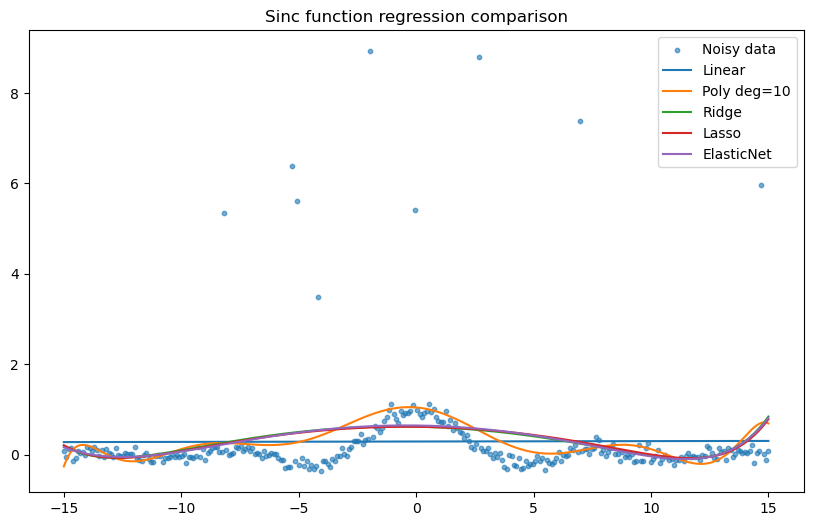

In [15]:
# -------------------------------
# Example run
# -------------------------------
if __name__ == "__main__":
    # Generate noisy sinc data with outliers
    X, y = generate_sinc(n_points=300, noise_std=0.1, outlier_ratio=0.03, rng=42)

    # Linear regression
    y_lin, _ = simple_linear_regression(X, y)
    mse_lin, mae_lin = evaluate(y, y_lin)

    # Polynomial regression degree=10
    y_poly, _ = polynomial_regression(X, y, degree=10)
    mse_poly, mae_poly = evaluate(y, y_poly)

    # Ridge regression
    y_ridge, _ = ridge_regression(X, y, degree=10, alpha=10.0)
    mse_ridge, mae_ridge = evaluate(y, y_ridge)

    # Lasso regression
    y_lasso, _ = lasso_regression(X, y, degree=10, alpha=0.01)
    mse_lasso, mae_lasso = evaluate(y, y_lasso)

    # ElasticNet regression
    y_enet, _ = elasticnet_regression(X, y, degree=10, alpha=0.01, l1_ratio=0.5)
    mse_enet, mae_enet = evaluate(y, y_enet)

    # Print results
    print("Linear:", mse_lin, mae_lin)
    print("Polynomial:", mse_poly, mae_poly)
    print("Ridge:", mse_ridge, mae_ridge)
    print("Lasso:", mse_lasso, mae_lasso)
    print("ElasticNet:", mse_enet, mae_enet)

    # Plot comparison
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, s=10, label="Noisy data", alpha=0.6)
    plt.plot(X, y_lin, label="Linear")
    plt.plot(X, y_poly, label="Poly deg=10")
    plt.plot(X, y_ridge, label="Ridge")
    plt.plot(X, y_lasso, label="Lasso")
    plt.plot(X, y_enet, label="ElasticNet")
    plt.legend()
    plt.title("Sinc function regression comparison")
    plt.show()